In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input layer (4 features of the flower) --> \
  # Hidden Layer1 (number of neurons) -->
  # H2(n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# pick a random seed for randomization
torch.manual_seed(41)

#create an instance Model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [ ]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
my_df['variety'] = my_df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Train test split! Set X, y

X = my_df.drop('variety',axis = 1)
y = my_df['variety']

In [ ]:
# Convert these to numpy arrays

X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [ ]:
# Convert X features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [ ]:
# set the criterion of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()

# Choosee Adam Optimizer, lr = learning rate(if error doesnt go down after bunch of iterations(epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [ ]:
#Train our Model!
# Epochs? (one run through all the training data in our network)

epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  #keep track of losses
  losses.append((loss.detach()).numpy())

  #print every 10 epochs
  if i % 10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  #Do back propagation:
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




epoch: 0 and loss: 0.009499614126980305
epoch: 10 and loss: 0.008920922875404358
epoch: 20 and loss: 0.008430850692093372
epoch: 30 and loss: 0.007952299900352955
epoch: 40 and loss: 0.007868134416639805
epoch: 50 and loss: 0.007325956132262945
epoch: 60 and loss: 0.006909631658345461
epoch: 70 and loss: 0.006585904397070408
epoch: 80 and loss: 0.006259348709136248
epoch: 90 and loss: 0.0063474178314208984


Text(0.5, 0, 'Epoch')

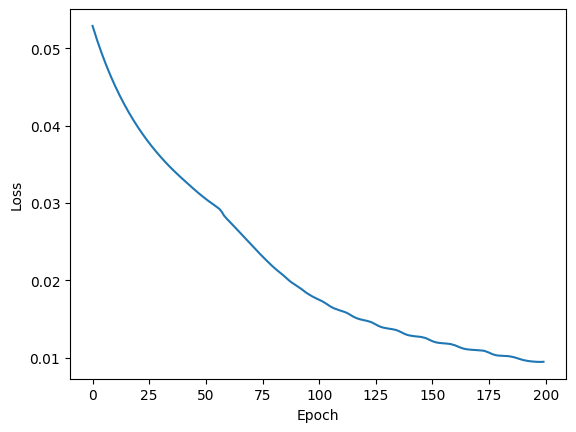

In [ ]:
#graph it out

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')